# MSC_DA_CA_2023205 

### Scenario: Transport in Ireland

In [4]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk 
from nltk.corpus import stopwords
nltk.download("stopwords")

from statsmodels.graphics.gofplots import qqplot
from scipy.stats import iqr, skew, norm, uniform, kurtosis, kstest, shapiro, binom, bernoulli ,poisson


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ledag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


- Data exploration

**Dataset Ireland exploration**

In [5]:
#Importing the datasets
df_ireland1 = pd.read_csv("TII03.csv")

In [6]:
#Exploring dataset by dataset
df_ireland1.head()

,STATISTIC,Statistic Label,TLIST(W1),Week,C03132V03784,Luas Line,UNIT,VALUE
0,TII03C01,Passenger Journeys,2019W01,2019 Week 01,-,All Luas lines,Number,549533.0
1,TII03C01,Passenger Journeys,2019W01,2019 Week 01,1,Red line,Number,274139.0
2,TII03C01,Passenger Journeys,2019W01,2019 Week 01,2,Green line,Number,275394.0
3,TII03C01,Passenger Journeys,2019W02,2019 Week 02,-,All Luas lines,Number,839022.0
4,TII03C01,Passenger Journeys,2019W02,2019 Week 02,1,Red line,Number,408199.0


In [7]:
#Examining the dataset's shape
df_ireland1.shape

(768, 8)

In [8]:
#The dataset has 768 observations and 8 attributes
#It is important to mention that in the attribute ["Luas Line"] the dataset has data for ["All Luas Lines"], ["Red line"] and ["Green line"]
#The dataset has to be separated and least in two ["All Luas lines"] and leave ["Red line"] and ["Green line"] together or separate them in 2 depending on the objective
#For this project the dataset will be just separated from the category ["All Luas lines"] to prevent duplicating the data as the other 2 observations added should be the same as the mentioned attribute
#The attributes ["STATISTIC"],["Statistic Label"],["TLIST(W1)"], and ["UNIT"] seem to be not necessary in this project therefore they will be getting dropped
#The attribute ["Week"] would be useful if it could become 2 different attributes as ["Year"] and ["Week_Year"]

In [9]:
#Dropping unnecessary columns
df_ireland1.drop(columns = ["STATISTIC","Statistic Label","TLIST(W1)","UNIT"], axis = 1, inplace = True)
df_ireland1.head()

,Week,C03132V03784,Luas Line,VALUE
0,2019 Week 01,-,All Luas lines,549533.0
1,2019 Week 01,1,Red line,274139.0
2,2019 Week 01,2,Green line,275394.0
3,2019 Week 02,-,All Luas lines,839022.0
4,2019 Week 02,1,Red line,408199.0


In [10]:
#Examining the data types included in the dataset
df_ireland1.dtypes

Week             object
C03132V03784     object
Luas Line        object
VALUE           float64
dtype: object

In [11]:
#Separating attribute ["Week"] into 2 attributes ["Year"] and ["Week_Year"]
split = df_ireland1["Week"].str.split(" ", n = 1, expand = True)
df_ireland1["Year"] =  split[0]
df_ireland1["Week_Year"] =  split[1]
df_ireland1.drop(columns = ["Week"], axis = 1, inplace = True)
df_ireland1

,C03132V03784,Luas Line,VALUE,Year,Week_Year
0,-,All Luas lines,549533.0,2019,Week 01
1,1,Red line,274139.0,2019,Week 01
2,2,Green line,275394.0,2019,Week 01
3,-,All Luas lines,839022.0,2019,Week 02
4,1,Red line,408199.0,2019,Week 02
...,...,...,...,...,...
763,1,Red line,578178.0,2023,Week 43
764,2,Green line,528068.0,2023,Week 43
765,-,All Luas lines,949071.0,2023,Week 44
766,1,Red line,502054.0,2023,Week 44


In [12]:
#Reindexing the dataset for understanding purposes
df_ireland1 = df_ireland1[["Year","Week_Year","Luas Line","C03132V03784","VALUE"]]
df_ireland1

,Year,Week_Year,Luas Line,C03132V03784,VALUE
0,2019,Week 01,All Luas lines,-,549533.0
1,2019,Week 01,Red line,1,274139.0
2,2019,Week 01,Green line,2,275394.0
3,2019,Week 02,All Luas lines,-,839022.0
4,2019,Week 02,Red line,1,408199.0
...,...,...,...,...,...
763,2023,Week 43,Red line,1,578178.0
764,2023,Week 43,Green line,2,528068.0
765,2023,Week 44,All Luas lines,-,949071.0
766,2023,Week 44,Red line,1,502054.0


In [13]:
#Examining general statistics parameters of the dataset
df_ireland1.describe()

,VALUE
count,7.590000e+02
mean,4.378549e+05
std,2.669235e+05
min,1.972700e+04
25%,2.289615e+05
50%,4.204630e+05
75%,5.307355e+05
max,1.173473e+06


In [14]:
#Having a look at the general information of the dataset
df_ireland1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          768 non-null    object 
 1   Week_Year     768 non-null    object 
 2   Luas Line     768 non-null    object 
 3   C03132V03784  768 non-null    object 
 4   VALUE         759 non-null    float64
dtypes: float64(1), object(4)
memory usage: 30.1+ KB


In [15]:
#Confirming the presence or not of null values
print(f'Duplicated values on dataset:\n{df_ireland1.isna().sum()}\n')

#Confirming the presence or not of duplicated values
print(f'Duplicated values on dataset: {df_ireland1.duplicated().sum()}')

Duplicated values on dataset:
Year            0
Week_Year       0
Luas Line       0
C03132V03784    0
VALUE           9
dtype: int64

Duplicated values on dataset: 0


In [16]:
#Identifying the missing values to make a decision of how to proceed with it
null_data = df_ireland1[df_ireland1.isnull().any(axis=1)]
null_data

,Year,Week_Year,Luas Line,C03132V03784,VALUE
156,2019,Week 53,All Luas lines,-,NaN
157,2019,Week 53,Red line,1,NaN
158,2019,Week 53,Green line,2,NaN
474,2021,Week 53,All Luas lines,-,NaN
475,2021,Week 53,Red line,1,NaN
476,2021,Week 53,Green line,2,NaN
633,2022,Week 53,All Luas lines,-,NaN
634,2022,Week 53,Red line,1,NaN
635,2022,Week 53,Green line,2,NaN


All the missing values seem to belong to the record of the Week 53  of the year.
After checking the unique values of each attribute to see which year the dataset include, a conlucio about it can be made.
A year contains 52 weeks, only leap years could have 53.

In [17]:
#Renaming columns for better understanding
df_ireland1.rename(columns = {"Luas Line": "Luas_line","C03132V03784": "Day_encoded", "Days of Week": "Week_day", "VALUE": "Passengers"}, inplace = True)
df_ireland1

,Year,Week_Year,Luas_line,Day_encoded,Passengers
0,2019,Week 01,All Luas lines,-,549533.0
1,2019,Week 01,Red line,1,274139.0
2,2019,Week 01,Green line,2,275394.0
3,2019,Week 02,All Luas lines,-,839022.0
4,2019,Week 02,Red line,1,408199.0
...,...,...,...,...,...
763,2023,Week 43,Red line,1,578178.0
764,2023,Week 43,Green line,2,528068.0
765,2023,Week 44,All Luas lines,-,949071.0
766,2023,Week 44,Red line,1,502054.0


- Getting more insights on each attribute

In [18]:
#Creating a function to find the unique values in x dataframe
def dataframe_uniques(dataset):
    columns = dataset.columns
    for column in columns:
        print(f'{column}: {dataset[column].unique()}')
        print(f'{column}: {dataset[column].nunique()}\n')

In [19]:
dataframe_uniques(df_ireland1)

Year: ['2019' '2020' '2021' '2022' '2023']
Year: 5

Week_Year: ['Week 01' 'Week 02' 'Week 03' 'Week 04' 'Week 05' 'Week 06' 'Week 07'
 'Week 08' 'Week 09' 'Week 10' 'Week 11' 'Week 12' 'Week 13' 'Week 14'
 'Week 15' 'Week 16' 'Week 17' 'Week 18' 'Week 19' 'Week 20' 'Week 21'
 'Week 22' 'Week 23' 'Week 24' 'Week 25' 'Week 26' 'Week 27' 'Week 28'
 'Week 29' 'Week 30' 'Week 31' 'Week 32' 'Week 33' 'Week 34' 'Week 35'
 'Week 36' 'Week 37' 'Week 38' 'Week 39' 'Week 40' 'Week 41' 'Week 42'
 'Week 43' 'Week 44' 'Week 45' 'Week 46' 'Week 47' 'Week 48' 'Week 49'
 'Week 50' 'Week 51' 'Week 52' 'Week 53']
Week_Year: 53

Luas_line: ['All Luas lines' 'Red line' 'Green line']
Luas_line: 3

Day_encoded: ['-' '1' '2']
Day_encoded: 3

Passengers: [ 549533.  274139.  275394.  839022.  408199.  430823.  819359.  376785.
  442574.  860745.  405224.  455521.  912795.  441197.  471598.  912612.
  449398.  463215.  940476.  466795.  473682.  952291.  480974.  471317.
  929391.  468299.  461093.  941919.  475

After getting the uniques per attribute it can be conclude the following:
- The dataset contains record of 5 years in which just 2020 is a leap year containing 53 weeks, also 2023 hasn't ended so it would be good to check how updated the records are for this year.
- It is important to mention that in the attribute ["Luas Line"] the dataset has data for ["All Luas Lines"], ["Red line"] and ["Green line"].The dataset has to be separated and least in two ["All Luas lines"] and leave ["Red line"] and ["Green line"] together or separate them in 2 depending on the objective.
- The attribute ["Line_encoded"] contains a unique value of "-" which can be related to one type of ["Luas Line"], however is not useful in this way, it has to be edited.

In [20]:
#Checking how many weeks have been recorded for the year 2023
df_ireland1.loc[df_ireland1["Year"] == 2023]
df_ireland1

,Year,Week_Year,Luas_line,Day_encoded,Passengers
0,2019,Week 01,All Luas lines,-,549533.0
1,2019,Week 01,Red line,1,274139.0
2,2019,Week 01,Green line,2,275394.0
3,2019,Week 02,All Luas lines,-,839022.0
4,2019,Week 02,Red line,1,408199.0
...,...,...,...,...,...
763,2023,Week 43,Red line,1,578178.0
764,2023,Week 43,Green line,2,528068.0
765,2023,Week 44,All Luas lines,-,949071.0
766,2023,Week 44,Red line,1,502054.0


In [21]:
#Dropping the missing values
df_ireland1.dropna(inplace = True)
df_ireland1

,Year,Week_Year,Luas_line,Day_encoded,Passengers
0,2019,Week 01,All Luas lines,-,549533.0
1,2019,Week 01,Red line,1,274139.0
2,2019,Week 01,Green line,2,275394.0
3,2019,Week 02,All Luas lines,-,839022.0
4,2019,Week 02,Red line,1,408199.0
...,...,...,...,...,...
763,2023,Week 43,Red line,1,578178.0
764,2023,Week 43,Green line,2,528068.0
765,2023,Week 44,All Luas lines,-,949071.0
766,2023,Week 44,Red line,1,502054.0


In [22]:
def replace_values(code):
    if code == "-":
        return 0
    else:
        return code
    
df_ireland1["Day_encoded"] = df_ireland1["Day_encoded"].apply(replace_values)
df_ireland1

,Year,Week_Year,Luas_line,Day_encoded,Passengers
0,2019,Week 01,All Luas lines,0,549533.0
1,2019,Week 01,Red line,1,274139.0
2,2019,Week 01,Green line,2,275394.0
3,2019,Week 02,All Luas lines,0,839022.0
4,2019,Week 02,Red line,1,408199.0
...,...,...,...,...,...
763,2023,Week 43,Red line,1,578178.0
764,2023,Week 43,Green line,2,528068.0
765,2023,Week 44,All Luas lines,0,949071.0
766,2023,Week 44,Red line,1,502054.0


In [23]:
#Checking the changes had been made
df_ireland1.isnull().sum()

Year           0
Week_Year      0
Luas_line      0
Day_encoded    0
Passengers     0
dtype: int64

In [24]:
#Creation of the 2 dataset
df_general = df_ireland1.loc[df_ireland1["Luas_line"] == "All Luas lines"]
df_expanded = df_ireland1.loc[df_ireland1["Luas_line"] != "All Luas lines"]

In [25]:
df_expanded_green = df_ireland1.loc[df_ireland1["Luas_line"] != "All Luas lines"].loc[df_ireland1["Luas_line"] == "Green line"]
df_expanded_green

,Year,Week_Year,Luas_line,Day_encoded,Passengers
2,2019,Week 01,Green line,2,275394.0
5,2019,Week 02,Green line,2,430823.0
8,2019,Week 03,Green line,2,442574.0
11,2019,Week 04,Green line,2,455521.0
14,2019,Week 05,Green line,2,471598.0
...,...,...,...,...,...
755,2023,Week 40,Green line,2,515962.0
758,2023,Week 41,Green line,2,513554.0
761,2023,Week 42,Green line,2,514208.0
764,2023,Week 43,Green line,2,528068.0


In [26]:
#Creating a general function for labels in graphs

def label_graph(x_label, y_label, title_label, width, height):
    
    plt.figure(figsize = (width, height))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title_label)

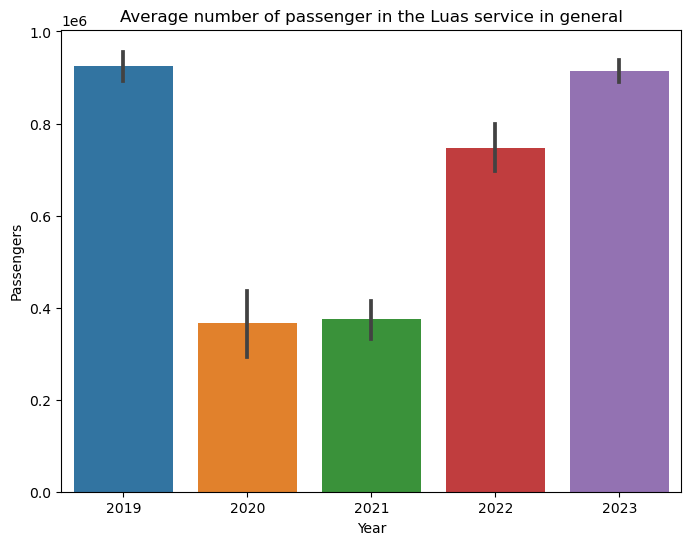

In [27]:
#Plotting the average passanger per year in all the tram lines
label_graph("Year", "Passengers","Average number of passenger in the Luas service in general", 8, 6)
sns.barplot(data = df_ireland1.loc[df_ireland1["Luas_line"] == "All Luas lines"], x = "Year", y = "Passengers");

**Dataset other countries exploration**

In [135]:
df_eucountries = pd.read_csv("estat_rail_pa_total_en.csv")
df_eucountries

,DATAFLOW,LAST UPDATE,freq,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:RAIL_PA_TOTAL(1.0),29/11/23 23:00:00,A,MIO_PKM,AT,2004,8274.0,NaN
1,ESTAT:RAIL_PA_TOTAL(1.0),29/11/23 23:00:00,A,MIO_PKM,AT,2005,8685.0,NaN
2,ESTAT:RAIL_PA_TOTAL(1.0),29/11/23 23:00:00,A,MIO_PKM,AT,2006,8907.0,NaN
3,ESTAT:RAIL_PA_TOTAL(1.0),29/11/23 23:00:00,A,MIO_PKM,AT,2007,9167.0,NaN
4,ESTAT:RAIL_PA_TOTAL(1.0),29/11/23 23:00:00,A,MIO_PKM,AT,2008,10365.0,NaN
...,...,...,...,...,...,...,...,...
1217,ESTAT:RAIL_PA_TOTAL(1.0),29/11/23 23:00:00,A,THS_PAS,UK,2015,1741562.0,NaN
1218,ESTAT:RAIL_PA_TOTAL(1.0),29/11/23 23:00:00,A,THS_PAS,UK,2016,1772563.0,NaN
1219,ESTAT:RAIL_PA_TOTAL(1.0),29/11/23 23:00:00,A,THS_PAS,UK,2017,1757359.0,NaN
1220,ESTAT:RAIL_PA_TOTAL(1.0),29/11/23 23:00:00,A,THS_PAS,UK,2018,1783232.0,NaN


## Statistics

- Descriptive statistics

**Descriptive statistics Ireland Dataset**

Shape of the data

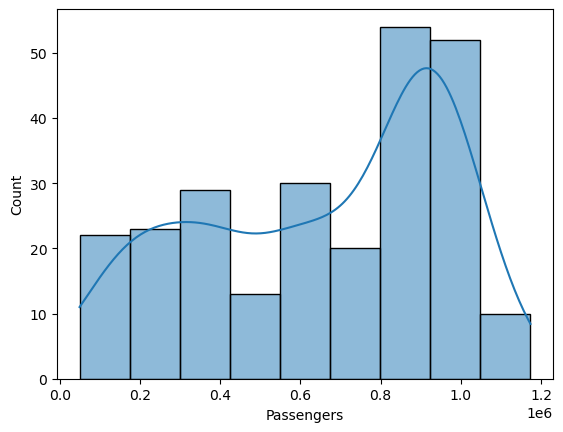

In [28]:
sns.histplot(df_general["Passengers"], kde=True);

- Modes 

In this case it is Non- Symmetric bi-modal distribution due to the presence of two modes (two values that occur more frequently than any other).
It in fact a Non - Symmetric left - skewed bi modal distribution.

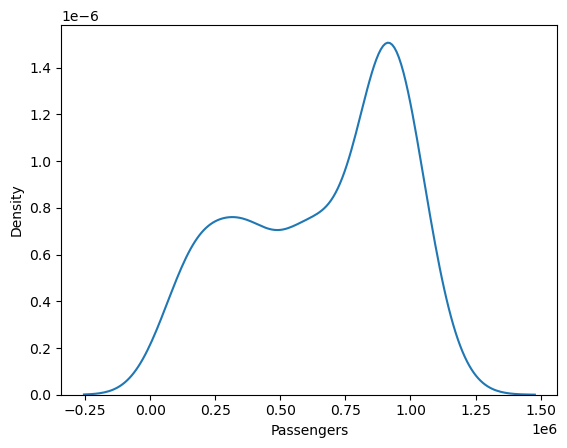

In [29]:
sns.kdeplot(df_general["Passengers"]);

- Skewness

In [30]:
#Skewness of the data
s = df_general["Passengers"].skew()
print(f'Coefficient of skewness (S): {s}')

Coefficient of skewness (S): -0.41804304374564455


It is known that negative values of skewness refers to Left-Skewed (Negative). Even if the distribution shows a bimodal distribution it it is evident the same has a left-skewed behaviour.


- Kurtosis

In [31]:
#Kurtosis of the data
k = df_general["Passengers"].kurtosis()
print(f'Kurtosis (K): {s}')

Kurtosis (K): -0.41804304374564455


A negative kurtosis indicates a Platykurtic distribution it's shape is more flatter than normal and spread out, most of the values are in a range, leaving the tails with not so many records.

Measures of central tendency

In [32]:
median = np.median(df_general["Passengers"])
print(f'Median: {median}')
mean = np.mean(df_general["Passengers"])
print(f'Mean: {mean}')
maximun = max(df_general["Passengers"])
print(f'Max Value: {maximun}')
minimun = min(df_general["Passengers"])
print(f'Min Value: {minimun}')
rangev = np.ptp(df_general["Passengers"])
print(f'Range: {rangev}')

Median: 739584.0
Mean: 656782.3122529645
Max Value: 1173473.0
Min Value: 49393.0
Range: 1124080.0


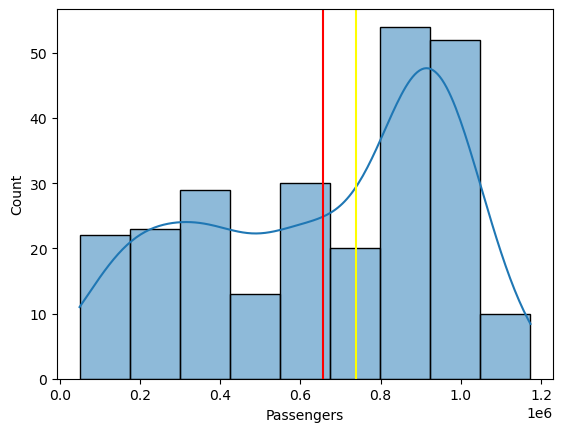

In [33]:
sns.histplot(df_general["Passengers"], kde=True);
plt.axvline(x = df_general["Passengers"].mean(),
            color='red');
plt.axvline(x = df_general["Passengers"].median(),
            color='yellow');

As seen in the grapgh above being the "red" line is the mean and the "yellow" the median. For the used dataset distribution it would be better to use the median due to the Left skewness of the data, being the median the value in between the mean and the left mode in this case.

Measures of variability

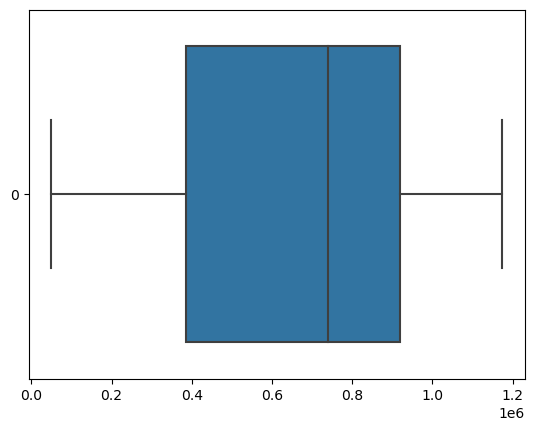

In [34]:
sns.boxplot(data = df_general["Passengers"], orient = "h");

In [35]:
df_general.describe()

,Passengers
count,2.530000e+02
mean,6.567823e+05
std,3.070219e+05
min,4.939300e+04
25%,3.862080e+05
50%,7.395840e+05
75%,9.192550e+05
max,1.173473e+06


In [36]:
std = np.std(df_general["Passengers"], ddof =1)
print(f'Standard deviation: {std}')

Standard deviation: 307021.90613315575


In [37]:
quantiles = np.quantile(df_general["Passengers"],[0,0.25,0.5,0.75,1])
print(f'Quantiles: {quantiles}')

Quantiles: [  49393.  386208.  739584.  919255. 1173473.]


In [38]:
q1 = np.quantile(df_general["Passengers"],0.25)
print(f'Q1: {q1}')
q2 = np.quantile(df_general["Passengers"],0.5)
print(f'Q2: {q2}')
q3 = np.quantile(df_general["Passengers"],0.75)
print(f'Q3: {q3}')

from scipy.stats import iqr
iqr = iqr(df_general["Passengers"])
print(f'IQR: {iqr}')

Q1: 386208.0
Q2: 739584.0
Q3: 919255.0
IQR: 533047.0


In [39]:
#Outliers
Outliers = df_general[((df_general["Passengers"]<(q1-1.5*iqr)) | (df_general["Passengers"]>(q3+1.5*iqr))) ]

In [40]:
print(f'Outliers_shape:  {Outliers.shape}')
print(f'df_general: {df_general.shape}')

Outliers_shape:  (0, 5)
df_general: (253, 5)


In [42]:
outliers = (df_general[~((df_general["Passengers"]<(q1-(1.5*iqr))) | (df_general["Passengers"]>(q3+(1.5*iqr)))) ] )
outliers

,Year,Week_Year,Luas_line,Day_encoded,Passengers
0,2019,Week 01,All Luas lines,0,549533.0
3,2019,Week 02,All Luas lines,0,839022.0
6,2019,Week 03,All Luas lines,0,819359.0
9,2019,Week 04,All Luas lines,0,860745.0
12,2019,Week 05,All Luas lines,0,912795.0
...,...,...,...,...,...
753,2023,Week 40,All Luas lines,0,1050425.0
756,2023,Week 41,All Luas lines,0,1045716.0
759,2023,Week 42,All Luas lines,0,1085573.0
762,2023,Week 43,All Luas lines,0,1106246.0


Graphically representation of the dataset compared to a normal distribution

C:\Users\ledag\AppData\Local\Temp\ipykernel_18872\2428925552.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_general["Passengers"], fit = norm);


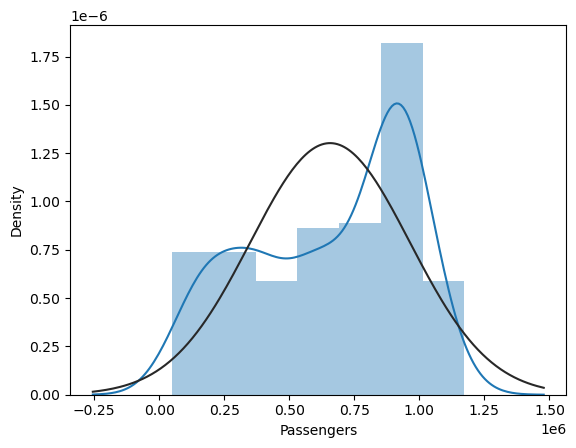

In [43]:
sns.distplot(df_general["Passengers"], fit = norm);
# plt.axvline(x = df_general["Passengers"].median(),
#             color='yellow');

- Shapiro - Wilk test

Hypothesis

Ho (Accepted): The data are normally distributed (Po > 0.05)

Ha (Rejected): The data are not normally distributed 

In [44]:
shapiro(df_general["Passengers"])

ShapiroResult(statistic=0.921481728553772, pvalue=2.6879770631538236e-10)

Based on the results it would have to be concluded, that being the pvalue obtained with the Shapiro Test 2.68 which it is greater than 0.05, the null hypothesis would have to be accepted. However, graphically it is evident the data is not normally distributed.

It is important to note that the Shapiro-Wilk test is a one-tailed test, meaning that it only detects deviations from normality in one tail of the distribution. Therefore, it is possible for a data set to be non-normal but not detected by the Shapiro-Wilk test. Therefore, other techniques would be used to test normality in this case.

- Q-Q plot

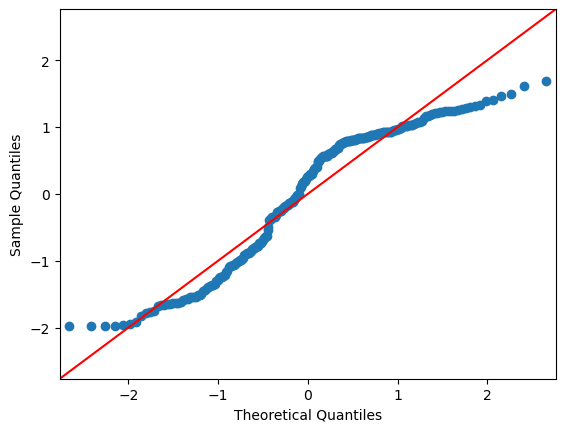

In [45]:
qqplot(df_general["Passengers"],norm, fit = True, line = "45")
plt.show()

It can be seen the two modes representing in the qqplot. It also shows how the data does not follows a normal ditribution.

- Inferential statistics

**Sampling the data**

C:\Users\ledag\AppData\Local\Temp\ipykernel_18872\2756182866.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample["Passengers"], fit = norm);


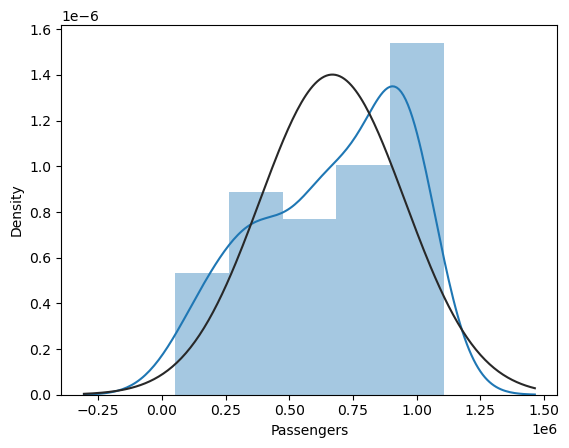

In [46]:
sample_size = 80
sample = df_general.sample(sample_size, random_state = 40)

sns.distplot(sample["Passengers"], fit = norm);

**Z-score test**

Ho: The mean of the passangers is 654636.38

Ha: The mean of the passangers i not equal to 654636.38

In [52]:
import math

#Values 
n = sample_size
cl = 0.95
alpha = 0.05
x_bar = np.mean(sample["Passengers"])
x = df_general["Passengers"].mean()
square = math.sqrt(n)
std_p = np.std(df_general["Passengers"], ddof =1)
std_error  = std_p / square

z = (x_bar-x)/std_error
print(f'Z score: {z}')

Z score: 0.3602765942113242


In [53]:
print(f'Population mean: {x}')
print(f'Sample mean: {x_bar}')

Population mean: 656782.3122529645
Sample mean: 669149.2


Having a confidence interval of 95% it means our p values correspondes to 5% divided into the 2 tails. 
The critical value in the normal would be then the 1-0.025 = 0.975 which in the Z score table gives us a value of 1.96.

The Z score obtained is in between the value of the ranges of acceptability 
which leads of to accept the null Hypothesis.

**Significance level**

P-value

In [77]:
#With a Z score of 0.36 the P value would be 0.6406
p_value = (1-0.6406)
print(f'P_value: {p_value}')
print(f'P_value <= alpa: {p_value<=alpha}')

P_value: 0.35940000000000005
P_value <= alpa: False


We accept the null hypothesis due to the fact that the P value is greater than 0.05 which leads us to accept the null hypothesis

**Confidence interval**

In [57]:
x_bar = np.mean(sample["Passengers"])
cl = 0.95
z =1.96
std_sample = np.std(sample["Passengers"])
square = math.sqrt(n)

In [63]:
margin_of_error = z*(std_sample/square)
print(f'Margin of error ME = {margin_of_error}')

Margin of error ME = 62380.13910722896


In [65]:
print(f'confidence_interval_lower = {x_bar - margin_of_error}')
print(f'confidence_interval_upper = {x_bar + margin_of_error}')

confidence_interval_lower = 606769.060892771
confidence_interval_upper = 731529.3391072289


**One sample proportion test**

C:\Users\ledag\AppData\Local\Temp\ipykernel_18872\2731096731.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample["Passengers"], fit = norm);


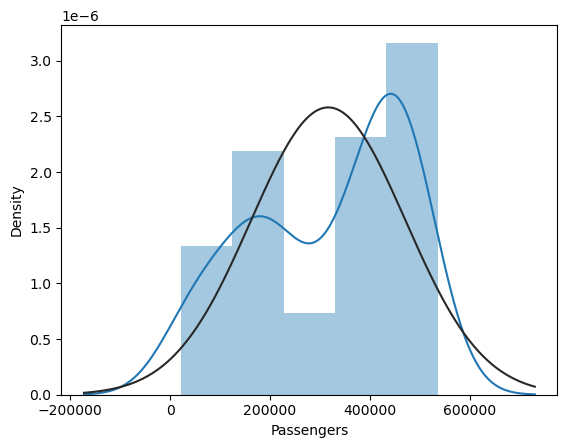

In [129]:
sample_size = 80
sample = df_expanded.sample(sample_size, random_state = 40)

sns.distplot(sample["Passengers"], fit = norm);

In [130]:
# Example data
sample_success = sample.loc[sample["Luas_line"] == "Green line"]["Passengers"].count()  
population_proportion = 0.6
print(sample_size, sample_success)
# Conduct one-sample proportion test
z_stat, p_value = proportions_ztest(sample_success, sample_size, population_proportion)

# Display the results
print(f'Z-statistic: {z_stat}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The sample proportion is significantly different from the population proportion.")
else:
    print("Fail to reject the null hypothesis: The sample proportion is not significantly different from the population proportion.")

80 34
Z-statistic: -3.1663189112233043
P-value: 0.0015438143671225619
Reject the null hypothesis: The sample proportion is significantly different from the population proportion.


# Machine Learning

- Sentimental analysis

In [53]:
!pip install praw

In [54]:
!pip install python-dotenv

In [55]:
import praw
from datetime import datetime as dt
from dotenv import load_dotenv
from os import getenv

In [56]:
load_dotenv()

True

In [57]:
# Get the environmental variables
APP_NAME = getenv('APP_NAME')
APP_ID = getenv("APP_ID")
APP_SECRET = getenv("APP_SECRET")
USERNAME = getenv('REDDIT_USERNAME')
#PASSWORD = getenv('PASSWORD')


In [58]:
#Testing
# Check that the variables all loaded
if APP_NAME and APP_ID and APP_SECRET and USERNAME:
    print("Credentials loaded")
else:
    print("ERROR: Credentials not loaded!!")


Credentials loaded


In [59]:
#Connecting to Reddit
reddit = praw.Reddit(
    client_id = getenv("APP_ID"),
    client_secret = getenv("APP_SECRET"),
    user_agent = f'CA_02 u/ {getenv("REDDIT_USERNAME")}',
)
    

In [60]:
print(reddit.read_only)

True


In [61]:
subreddit = reddit.subreddit("Ireland")

In [62]:
#Extracting the comments and relevant information
for post in subreddit.search("luas"):
    print("******")
    print("Text =", post.selftext)
    
    for comment in list(post.comments):
        print("Title =", post.title)
        print("Coment =", comment.body)
        print("Score =", comment.score)
        print("Comment count =", post.num_comments)
        print(dt.fromtimestamp(comment.created_utc))
        print("\n")
        print("------------------------------------------")
        
#print(subreddit.display_name)
#print(subreddit.title)
#print(subreddit.description)

******
Text = Absolutely fuming after an encounter with a Luas inspector today on the green line.

For context I always pay my fare and I’ve noticed a ridiculous amount of inspections recently so I wouldn’t dream of trying to dodge it right now.

So I tagged on at home to head to town for an appointment, then when I got to Dawson street didn’t tap off because I was in a rush and the 1€ 90 minute fare had already come off.

Went back to Dawson about an hour later, tapped the leap card. However it tapped off instead of on without me realising, still within the 90 minutes. Then I get my ticket checked on the Luas. I think nothing of it, happens all the time.

Then he says I’m not tapped on. And I say “um yes I did”. And he says “ well look here at my machine, it’s red it means it’s not valid.” 
So I’m like “ah yeah but look above, it’s tapped on from before and it’s within 90 minutes so it’s grand, I just mustn’t have tapped off, honest mistake”

Then he say’s because it’s red he has to f

Title = Men harassing women at luas stop in Dublin
Coment = Like what did they think was gonna happen?
They girls would just fall in love with them?
They are absolutely disgusting
Score = 330
Comment count = 280
2023-07-11 11:41:14


------------------------------------------
Title = Men harassing women at luas stop in Dublin
Coment = Hey look, it's real people who actually think they're versatile 🥲
Score = 84
Comment count = 280
2023-07-11 12:31:43


------------------------------------------
Title = Men harassing women at luas stop in Dublin
Coment = Calling them men is a stretch.
Score = 332
Comment count = 280
2023-07-11 11:02:11


------------------------------------------
Title = Men harassing women at luas stop in Dublin
Coment = I swear people are getting worse and worse. Just scumbags.
Score = 79
Comment count = 280
2023-07-11 12:15:17


------------------------------------------
Title = Men harassing women at luas stop in Dublin
Coment = Feel bad for these women

I’m a big la

Title = I worked as Luas Security for 4 Years AMA
Coment = Can you think of any reason why this type of security wouldn't work on intercity trains and Dart?
Score = 127
Comment count = 275
2023-05-14 10:32:17


------------------------------------------
Title = I worked as Luas Security for 4 Years AMA
Coment = How many times were you attacked ?
Score = 88
Comment count = 275
2023-05-14 10:36:49


------------------------------------------
Title = I worked as Luas Security for 4 Years AMA
Coment = How often were you in court as a result of your job?
Score = 150
Comment count = 275
2023-05-14 10:29:34


------------------------------------------
Title = I worked as Luas Security for 4 Years AMA
Coment =  How much, if any, help you would like or need from commuters, if things get dicey?
Score = 67
Comment count = 275
2023-05-14 11:04:21


------------------------------------------
Title = I worked as Luas Security for 4 Years AMA
Coment = What was the worst thing you've seen?
Score = 54


Title = Luas fined me for not paying a €0 fare
Coment = > I was reluctant to pay on the spot, but I was told that if I didn't the fine was €100, which of course I now know to not be true.

If that indeed isn't true, place a formal complaint, and follow it up. They should not be misleading people like that.

This is irrespective of whether you can appeal or not (you likely can't).
Score = 631
Comment count = 213
2023-09-26 14:47:39


------------------------------------------
Title = Luas fined me for not paying a €0 fare
Coment = Wait until you see the inspectors let the shitheads go free without a fine cause they know they will give fake info. 

You basically get fucked if you follow the rules here
Score = 312
Comment count = 213
2023-09-26 16:19:29


------------------------------------------
Title = Luas fined me for not paying a €0 fare
Coment = I got fined once because I had forgotten to top up my monthly card, it expired on for example 01/02 and the inspector checked it on 02/02 

Title = Absolutely no crowd control on the luas.
Coment = I'll be honest. You could go to any major city and hop onto the public transport  at this time of year and you'll be in the same sardine in a can situation. 

Source: was at Christmas  markets in Vienna last weekend and brother was in London recently and we both said the same thing.
Score = 36
Comment count = 27
2022-12-13 10:16:09


------------------------------------------
Title = Absolutely no crowd control on the luas.
Coment = I take it you don’t get the luas too often. This is pretty regular especially on the red line. Good luck trying to have security on every luas
Score = 12
Comment count = 27
2022-12-13 10:16:40


------------------------------------------
Title = Absolutely no crowd control on the luas.
Coment = \>Honestly, there needs to be more security at the stops to stop people from over crowding >trams to absolutely dangerous levels.

Honestly Luas really don't give a damn about overcrowding, never have
Score = 

Title = Do you feel safe on the luas and what is the worst thing you've seen happen on it?
Coment = Saw and smelt a woman eating fish from a lunchbox. Appears as if it was reheated in work and brought on to the luas. Probably the most psychopathic thing I’ve ever seen
Score = 53
Comment count = 24
2022-06-17 07:28:40


------------------------------------------
Title = Do you feel safe on the luas and what is the worst thing you've seen happen on it?
Coment = A teen getting slashed across his coat luckily it was a puffer one, so the knife didn't slice him open. I've also seen a young lad starting on a granny and a guy fishing drugs out of his arse in rush hour. All on the Green Line.
Score = 24
Comment count = 24
2022-06-17 07:44:33


------------------------------------------
Title = Do you feel safe on the luas and what is the worst thing you've seen happen on it?
Coment = Saw a horse on it. Saw a lad get stabbed at the stop then get on for two stops to go to tallaght hospital. Saw s

Title = Scrotes on the Luas
Coment = Obviously a scary situation, but a part of my did lol that David's first reaction was to send a tweet.
Score = 901
Comment count = 300
2021-09-28 20:21:40


------------------------------------------
Title = Scrotes on the Luas
Coment = [deleted]
Score = 327
Comment count = 300
2021-09-28 20:39:33


------------------------------------------
Title = Scrotes on the Luas
Coment = The security on the Luas look built and equipped enough to invade a country but never around when it matters.
Score = 322
Comment count = 300
2021-09-28 22:32:22


------------------------------------------
Title = Scrotes on the Luas
Coment = To think I was asked to get off the Luas because of my concealed carry Katana. Don't want me to protect Luas passengers from the barbarians at the gates? Fine I'll take my knowledge of *the blade* to Dublin bus
Score = 387
Comment count = 300
2021-09-28 22:18:32


------------------------------------------
Title = Scrotes on the Luas
Co

Title = Have you seen an act of kindness on the Luas?
Coment = A man carrying a bottle of his own piss told me that you can't bring a full bottle of piss through the airport.  Sage advice.
Score = 246
Comment count = 189
2022-08-18 14:45:47


------------------------------------------
Title = Have you seen an act of kindness on the Luas?
Coment = During the snowstorms back in 2010 the luas was one of the only reliable ways of getting in and out of town so they were packed. A very nice fella standing a few people away told me that my phone was falling out of my pocket. I thanked him and put my phone back in. He took a beat and then said “no worries bud, if I was near you I would have robbed it”.

I think of him often.
Score = 789
Comment count = 189
2022-08-18 14:39:24


------------------------------------------
Title = Have you seen an act of kindness on the Luas?
Coment = Once saw a lad finger his missus when they were both plastered, when I was on the way home from work at like 6pm.

Title = Gardaí Onboard Luas Enforcing Face Covering. Luas Staff and Security Also Engaged.
Coment = Aww that's lovely news for the Luas staff and security. Have they decided on a date yet? 


But seriously, great to see it is being enforced, way too many cunts out there think they're invincible and won't catch or spread that shit around.
Score = 400
Comment count = 107
2020-07-13 13:05:15


------------------------------------------
Title = Gardaí Onboard Luas Enforcing Face Covering. Luas Staff and Security Also Engaged.
Coment = Gardaí have legs under there! Who knew!
Score = 191
Comment count = 107
2020-07-13 12:13:11


------------------------------------------
Title = Gardaí Onboard Luas Enforcing Face Covering. Luas Staff and Security Also Engaged.
Coment = Never saw Garda shorts.
Score = 59
Comment count = 107
2020-07-13 13:50:24


------------------------------------------
Title = Gardaí Onboard Luas Enforcing Face Covering. Luas Staff and Security Also Engaged.
Coment = That g

Title = Close call on the Luas?
Coment = et puis tout le bus a applaudi
Score = 550
Comment count = 85
2023-07-13 18:00:13


------------------------------------------
Title = Close call on the Luas?
Coment = Did anyone hear your wan on the redline last night around half nine screaming about how she had “CHUR-ETZ” and to stop laughing at her? Still have a headache from it. She got all up in my face saying “do you have a problem with me because I have Tourette’s!???” I just pretend to be foreign and got up to leave. Then she goes “are you leaving because I have Tourette’s!? Do I make you uncomfortable?? You’re so rude leaving now because I have Tourette’s! Do you hate disabled people or something!??”
Score = 91
Comment count = 85
2023-07-13 19:26:04


------------------------------------------
Title = Close call on the Luas?
Coment = Well done. You defused the situation, helped some tourists and you speak French. Swoon.
Score = 182
Comment count = 85
2023-07-13 17:58:31


--------------

Title = Never mind, I just remembered the LUAS is free.
Coment = I'll bet that fox couldn't believe it's luck finding a nice warm room that wasn't there before.

I'd love to see the look on its face when it leaves and realises it's completely lost.
Score = 116
Comment count = 70
2023-01-12 15:01:27


------------------------------------------
Title = Never mind, I just remembered the LUAS is free.
Coment = Talk to him for a side quest
Score = 291
Comment count = 70
2023-01-12 13:01:59


------------------------------------------
Title = Never mind, I just remembered the LUAS is free.
Coment = Taking up two seats? He's a sly one
Score = 69
Comment count = 70
2023-01-12 14:26:39


------------------------------------------
Title = Never mind, I just remembered the LUAS is free.
Coment = Follow the fox, he’ll lead you to the orchard thieves
Score = 136
Comment count = 70
2023-01-12 11:22:25


------------------------------------------
Title = Never mind, I just remembered the LUAS is free

Title = Red Cow Luas Stop today
Coment = Jesus....that's fucking awful.

Well, the security seem to be beyond useless.
Score = 193
Comment count = 77
2023-07-12 21:15:45


------------------------------------------
Title = Red Cow Luas Stop today
Coment = At the red cow p&r? I haven't been on the luas in a while but isn't the red cow parking usually fairly busy? These guys are getting very brave if they're starting to target cars in busy parking lots.
Score = 67
Comment count = 77
2023-07-12 21:41:56


------------------------------------------
Title = Red Cow Luas Stop today
Coment = Hopefully insurance will cover it.
Score = 24
Comment count = 77
2023-07-12 21:13:51


------------------------------------------
Title = Red Cow Luas Stop today
Coment = I miss steel wheels on cars, no fucker ever stole a steely
Score = 29
Comment count = 77
2023-07-12 22:04:50


------------------------------------------
Title = Red Cow Luas Stop today
Coment = You'd probably see less damage if you left

Title = Respect to the Luas Driver
Coment = Legend
Score = 362
Comment count = 78
2020-10-15 20:14:46


------------------------------------------
Title = Respect to the Luas Driver
Coment = [deleted]
Score = 162
Comment count = 78
2020-10-15 21:23:09


------------------------------------------
Title = Respect to the Luas Driver
Coment = We need more like him
Score = 99
Comment count = 78
2020-10-15 20:27:30


------------------------------------------
Title = Respect to the Luas Driver
Coment = Give that driver a raise!

Unfortunately, I take the red line everyday. Would be nice if the luas drivers tried that there as well, but I suspect the whole line would come to a standstill.
Score = 115
Comment count = 78
2020-10-15 22:16:19


------------------------------------------
Title = Respect to the Luas Driver
Coment = Had a bus driver do that once. Stopped the bus, apologised to us sitting downstairs for the temporary delay, then went up the stairs and said loudly to whoever didn’t ha

Title = Don't worry COVID doesn't exist on a Luas that is more packed than a train in Mumbai
Coment = And this is the exact problem with closing all pubs and clubs at the same time
Score = 471
Comment count = 393
2021-11-21 16:37:20


------------------------------------------
Title = Don't worry COVID doesn't exist on a Luas that is more packed than a train in Mumbai
Coment = I turned to my wife and said this exact thing would happen the second I heard about 12 closing time. People would go out earlier and no one is going home before 12 so every chipper and public transport option is going to be exactly the same up and down the country. 

It honestly would have made more sense to extend the opening hours as counter intuitive as it sounds at first.
Score = 147
Comment count = 393
2021-11-21 19:11:31


------------------------------------------
Title = Don't worry COVID doesn't exist on a Luas that is more packed than a train in Mumbai
Coment = They should never have made the Luas free.

Title = Sandyford Luas - Luas stop security
Coment = Report to gardai asap, luas security footage on doesn’t last on their system long
Score = 114
Comment count = 56
2022-09-04 09:14:52


------------------------------------------
Title = Sandyford Luas - Luas stop security
Coment = I’ve no doubt they’re all little scutters out of Ballyogan , they roam the Luas up and down all day from Sandyford to Cherrywood causing disruption. 

Little degenerate shits the lot of em. They all need an unmerciful hiding with a leather belt.
Score = 38
Comment count = 56
2022-09-04 12:57:40


------------------------------------------
Title = Sandyford Luas - Luas stop security
Coment = I am sorry to hear that your daughter had terrible experience. This is not antisocial behaviour anymore its crime and it should be treated as crime. Law needs to change to treat these individuals as criminals regardless of their age.
Score = 68
Comment count = 56
2022-09-04 09:15:20


------------------------------------

Title = Man stands infront of moving LUAS.
Coment = The amount of fuckin dumb cunts around never ceases to amaze me
Score = 217
Comment count = 125
2022-04-21 11:21:19


------------------------------------------
Title = Man stands infront of moving LUAS.
Coment = Bet he feels like a hardman for doing that too the dope.
Score = 142
Comment count = 125
2022-04-21 11:34:31


------------------------------------------
Title = Man stands infront of moving LUAS.
Coment = The “Don’t walk out in front of the poxy luas” at the end is giving me joy
Score = 204
Comment count = 125
2022-04-21 10:24:59


------------------------------------------
Title = Man stands infront of moving LUAS.
Coment = In this weeks episode of man vs Luas
Score = 57
Comment count = 125
2022-04-21 10:25:12


------------------------------------------
Title = Man stands infront of moving LUAS.
Coment = I know it is fashionable to give out about how much LUAS drivers make but this kind of shite is ongoing and I think the 

Title = Girl (16) kicked and kneed woman after ‘fat shaming’ her on Luas, court told
Coment = Scumbag
Score = 117
Comment count = 140
2023-12-12 18:34:41


------------------------------------------
Title = Girl (16) kicked and kneed woman after ‘fat shaming’ her on Luas, court told
Coment = "now 18". Ye know what that means
Score = 87
Comment count = 140
2023-12-12 18:56:42


------------------------------------------
Title = Girl (16) kicked and kneed woman after ‘fat shaming’ her on Luas, court told
Coment = From the article: "Garda Cashe said that one girl, yet to be identified, struck the woman’s head with a glass bottle, and the defendant also attacked her." 
Yet to be identified.... 🤦
Score = 18
Comment count = 140
2023-12-12 21:10:31


------------------------------------------
Title = Girl (16) kicked and kneed woman after ‘fat shaming’ her on Luas, court told
Coment = I, as a fully grown man, was shoulder-checked by what looked like a 15 year old girl last week on the street.

Title = Found this on the Luas.
Coment = ![gif](giphy|RBAPmppHJlgpG)
Score = 79
Comment count = 64
2023-10-28 13:21:01


------------------------------------------
Title = Found this on the Luas.
Coment = They're telling me to call Jesus but they haven't even printed his phone number. Amateurs.
Score = 68
Comment count = 64
2023-10-28 13:08:53


------------------------------------------
Title = Found this on the Luas.
Coment = Acceptation 😂😂😂😂😂
Score = 9
Comment count = 64
2023-10-28 14:10:39


------------------------------------------
Title = Found this on the Luas.
Coment = I love the citing of biblical passages as evidence!

"If it's in a book, it's got to be true!"
Score = 29
Comment count = 64
2023-10-28 11:01:08


------------------------------------------
Title = Found this on the Luas.
Coment = As someone who used to hand stuff like this out I now cringe at the thought of it.
Score = 11
Comment count = 64
2023-10-28 19:11:45


------------------------------------------
Title 

Title = Saw this watermelon on the Luas.
Coment = Very meloncholy
Score = 50
Comment count = 72
2023-02-16 19:30:56


------------------------------------------
Title = Saw this watermelon on the Luas.
Coment = He's a sad watermelon because he wants to marry his beloved partner, but the pear of them cantaloupe..
Score = 72
Comment count = 72
2023-02-16 19:45:15


------------------------------------------
Title = Saw this watermelon on the Luas.
Coment = This is up there with that fella that slipped on the ice on rte
Score = 30
Comment count = 72
2023-02-16 19:30:57


------------------------------------------
Title = Saw this watermelon on the Luas.
Coment = Go banana!
Score = 21
Comment count = 72
2023-02-16 20:04:15


------------------------------------------
Title = Saw this watermelon on the Luas.
Coment = You did the right thing, posting this here.
Score = 20
Comment count = 72
2023-02-16 22:59:46


------------------------------------------
Title = Saw this watermelon on the Lu

Title = Please look out for each other on the Luas
Coment = https://preview.redd.it/f03062wr5m3b1.jpeg?width=310&format=pjpg&auto=webp&s=caa55ccb75f963255f15d615ea000ca8be6523bf

Well done. The other day a drunk man was harassing underage girls on the red line. I reported it using this number, Rail Security got on at Heuston and removed him. This city belongs to all of us; we must look out for one another and take action against anti-social behaviour.
Score = 461
Comment count = 70
2023-06-02 15:19:01


------------------------------------------
Title = Please look out for each other on the Luas
Coment = Well done for stepping in. I have a feeling other people noticed but didn't say anything. I used to have people like this come into the pub I worked in. They'd back their seat up right behind someone else and hope to steal from their jacket or bag. The easiest solution was just to stand and look at them so they and the potential victim would know what was up. They always got up and lef

Title = Dublin Bus, Luas and Go-Ahead fined €5m for delays and no shows
Coment = Ended up having to walk 6km to work last week as the Go-Ahead bus never came. Good for the hips, bad for being on time.
Score = 241
Comment count = 123
2022-09-26 11:15:18


------------------------------------------
Title = Dublin Bus, Luas and Go-Ahead fined €5m for delays and no shows
Coment = I know a few lads who work for Dublin bus or are contracted by Dublin bus and they tell me that they don't have enough drivers to drive the buses, so they'll never be able to meet their scheduled services. Dublin bus like any bus operator or company involved in transportation cannot get drivers, who'd do it? It's a shit job. Someone explained it right to me a while ago, there is no shortage of drivers, just a shortage of wages that reflect the hours and responsibilities.
Score = 121
Comment count = 123
2022-09-26 12:45:31


------------------------------------------
Title = Dublin Bus, Luas and Go-Ahead fined €5m 

Title = As overcrowding puts some passengers off the Luas, NTA says plans are afoot to address the problem
Coment = I get the Red Line luas. I'm thankfully before Heuston and let me tell you one thing, before you even get to Heuston at peak times it's already too full. The last 2 times I've taken it a few people have had arguments because they can't move, or people are falling into others because they don't have anything to hold onto where they're standing. It gets so packed that at Museum and the Four Courts stops you have people pushing through the packed in crowd trying to get out before the doors close and the luas continues on. It's mental
Score = 137
Comment count = 107
2023-12-14 08:36:44


------------------------------------------
Title = As overcrowding puts some passengers off the Luas, NTA says plans are afoot to address the problem
Coment = This is going to get way worse before it gets any better 🙄
Score = 65
Comment count = 107
2023-12-14 09:05:04


----------------------

Title = Abuse in the Luas to tourists
Coment = The reminds me of a situation on the Red Luas line. I was standing there holding a pole when a group of young wans came on. Same type of people, loud and obnoxious with music blaring out of their phones. Anyway the tram got underway and it lurched, knocking one of them into me. That’s important, she knocked into me. 

She looks up at me and says ‘D’you mind?!’ To which I replied I didn’t. You knocked into me and I didn’t give a shit. That’s just travelling on a packed luas. She started to rip into me and I basically ignored her because fighting a fifteen year old girl isn’t a good look. When she went looking for support she asked a middle aged man nearby what he’d do if she was his daughter— and this man, this fucking hero— he said ‘If you were my daughter you’d know better than to act like a little shit in public.’

I know nothing else about this lad, but I would die for him.
Score = 159
Comment count = 74
2023-03-17 12:30:21


----------

Title = Luas Rant
Coment = I love the green line, its magnificent.
Beats the bus or driving any day
Score = 22
Comment count = 21
2023-10-13 23:25:18


------------------------------------------
Title = Luas Rant
Coment = > And today while I wait at a stop in town for 25mins with no schedule advertised to join a tram full of Ireland football fans

Someone parked on the tracks. Not even tracks that are shared with a road, literally drove along and parked in the centre of a dedicated track, blocking the Luas in both directions. What are they supposed to do?
Score = 16
Comment count = 21
2023-10-13 23:08:18


------------------------------------------
Title = Luas Rant
Coment = Red line is grim, green line is like ridding the heaven express
Score = 3
Comment count = 21
2023-10-14 09:36:27


------------------------------------------
Title = Luas Rant
Coment = Luas Redline is a disaster, all the sketchy stuff aside not nearly enough trams running to Saggart direct we have so many people tr

Title = Busker singing you've got a friend to an autistic child on the luas ♥
Coment = Aww the kids giggle is magical. What a lovely man.
Score = 127
Comment count = 85
2021-03-04 16:26:31


------------------------------------------
Title = Busker singing you've got a friend to an autistic child on the luas ♥
Coment = His name is Mick Mc Loughin on youtube If yous want to check him out but this is so heartwarming i thought I'd share
Original video
https://vm.tiktok.com/ZMeM8ywsc/
Score = 143
Comment count = 85
2021-03-04 15:46:59


------------------------------------------
Title = Busker singing you've got a friend to an autistic child on the luas ♥
Coment = This is it... This is what the Internet was designed for.
I can rest now..
Score = 47
Comment count = 85
2021-03-04 16:47:54


------------------------------------------
Title = Busker singing you've got a friend to an autistic child on the luas ♥
Coment = Ah thats gorgeous
Score = 20
Comment count = 85
2021-03-04 18:05:25


----

Title = Anti-Maskers protesting on the Luas. Obviously helping matters in this difficult time.
Coment = They're always so brave when they're hassling ordinary people, aren't they?
Score = 191
Comment count = 266
2020-11-02 18:08:46


------------------------------------------
Title = Anti-Maskers protesting on the Luas. Obviously helping matters in this difficult time.
Coment =  I'm the woman in the video with the hood up and arguing with them and I'm the one who shouted at them. They all came for me.

Here's a recording of when I got off

https://youtu.be/lXVXqSWdRsc
Score = 520
Comment count = 266
2020-11-02 19:31:13


------------------------------------------
Title = Anti-Maskers protesting on the Luas. Obviously helping matters in this difficult time.
Coment = Couple of the same faces you see a lot at the far right rallies
Score = 79
Comment count = 266
2020-11-02 18:20:27


------------------------------------------
Title = Anti-Maskers protesting on the Luas. Obviously helping m

Title = Just did that thing where you swallow your own saliva the wrong way and start coughing. I'm on a busy luas.
Coment = Then you wheeze and wheeze but cannot inhale any air.  Been there, done that.
Score = 257
Comment count = 183
2020-07-30 08:29:10


------------------------------------------
Title = Just did that thing where you swallow your own saliva the wrong way and start coughing. I'm on a busy luas.
Coment = I got a bit of a coughing fit in Tesco back in April.  I nearly caused a fucking stampede.
Score = 548
Comment count = 183
2020-07-30 09:11:46


------------------------------------------
Title = Just did that thing where you swallow your own saliva the wrong way and start coughing. I'm on a busy luas.
Coment = It's weird that this is such a universal thing to do/happen, but we don't have any name for it.
Score = 154
Comment count = 183
2020-07-30 09:10:42


------------------------------------------
Title = Just did that thing where you swallow your own saliva the wro

Title = Luas fine
Coment = Special Branch are going to show up to one of your lectures to arrest you.
Score = 76
Comment count = 42
2023-02-23 15:04:29


------------------------------------------
Title = Luas fine
Coment = I know a lad from Ucd who gave his Ucd student card and they requested info off the college to give him a fine to his real address as he did it several times. Hilarious stuff all together but he owed 3 fines of 100 each then.
Score = 20
Comment count = 42
2023-02-23 15:11:35


------------------------------------------
Title = Luas fine
Coment = Hope you are not planning on going to the USA or Australia after college
Score = 33
Comment count = 42
2023-02-23 14:38:27


------------------------------------------
Title = Luas fine
Coment = Hope you dont intend on ever getting a mortage, starting a family ot being happy and successful in life the Luas thing is going to hang over your head for life 

/s
Score = 14
Comment count = 42
2023-02-23 15:09:25


----------------

Title = Tagging Off Luas
Coment = You are assuming everyone is at max fare
Score = 39
Comment count = 15
2023-11-04 16:52:08


------------------------------------------
Title = Tagging Off Luas
Coment = It's pointless if you're at your destination and won't be using transport again for a few hours. But if you're grabbing a connection then it will "tag-off" when you mean to tag-on and the Luas stormtroopers can fine you depending on what mood they're in. Makes zero sense but it's a failing of Translink more than anything else.

If you have a tag-on in the last 90 minutes common sense should dictate you're good to go no matter what
Score = 15
Comment count = 15
2023-11-04 16:54:25


------------------------------------------
Title = Tagging Off Luas
Coment = You **must** tag-off if you are:

* changing lines
* intending to start another journey within 90 minutes (one line)/180 minutes (two lines) of your previous one starting
Score = 5
Comment count = 15
2023-11-04 17:28:06


----------

Title = 'FingLUAS': Plans to extend Luas to Finglas revealed
Coment = I'm interested to see the planned route.  No details seem to be given just yet, apart from a map from 4 years ago.  Some dates would be nice too.

This will be a well needed boost to the Finglas/Charlestown/Meakstown areas.

I wonder if they would ever extend this to the airport, or even just as far as Ballymun to meet up with the Metro.
Score = 37
Comment count = 88
2020-02-26 13:45:06


------------------------------------------
Title = 'FingLUAS': Plans to extend Luas to Finglas revealed
Coment = “So does Dublin have a transport link to the airport?”

“Nearly! You can take the tram from town into Ballymun then take a horse the rest of the way”
Score = 67
Comment count = 88
2020-02-26 15:49:13


------------------------------------------
Title = 'FingLUAS': Plans to extend Luas to Finglas revealed
Coment = It's like none of these arseholes have played the sublime **Mini Metro**.  

We  need **more lines**, not exte

Title = Why so few Northbound Luas'?
Coment = The trams are all migrating south for the winter
Score = 17
Comment count = 16
2023-10-25 21:59:39


------------------------------------------
Title = Why so few Northbound Luas'?
Coment = The LUAS schedule is, and always has been, a total catastrophe. Green line in particular due to the brainless idea to branch the lines before Parnell.
Score = 11
Comment count = 16
2023-10-25 23:53:45


------------------------------------------
Title = Why so few Northbound Luas'?
Coment = Serious answer: Central Park is south of the Sandyford terminus so you are only getting the trams from Brides Glen there.
Score = 3
Comment count = 16
2023-10-26 12:04:28


------------------------------------------
Title = Why so few Northbound Luas'?
Coment = You realise it's a closed system right?

Fast forward 30 mintutes or so and there'll be more trams running in the opposite direction
Score = 4
Comment count = 16
2023-10-26 00:33:26


--------------------------

Title = Luas driver just stopped the tram to tell the knackers to stop blaring their speakers
Coment = Is he still alive?
Score = 274
Comment count = 110
2019-03-24 10:17:30


------------------------------------------
Title = Luas driver just stopped the tram to tell the knackers to stop blaring their speakers
Coment = [deleted]
Score = 352
Comment count = 110
2019-03-24 10:19:25


------------------------------------------
Title = Luas driver just stopped the tram to tell the knackers to stop blaring their speakers
Coment = [deleted]
Score = 108
Comment count = 110
2019-03-24 10:17:16


------------------------------------------
Title = Luas driver just stopped the tram to tell the knackers to stop blaring their speakers
Coment = [deleted]
Score = 94
Comment count = 110
2019-03-24 12:19:50


------------------------------------------
Title = Luas driver just stopped the tram to tell the knackers to stop blaring their speakers
Coment = How did he announce it?

Bing bong "Passengers ar

Title = Breaking - Minister for Transport Eamon Ryan announces that the Luas is now free
Coment = [deleted]
Score = 328
Comment count = 109
2021-08-07 18:32:42


------------------------------------------
Title = Breaking - Minister for Transport Eamon Ryan announces that the Luas is now free
Coment = I hear it's because Katherine Zappone and Leo got caught without tickets.  So Leo said it was always free and people just didn't understand.
Score = 298
Comment count = 109
2021-08-07 18:27:09


------------------------------------------
Title = Breaking - Minister for Transport Eamon Ryan announces that the Luas is now free
Coment = Dublin Bus isn't free until tomorrow.
Score = 29
Comment count = 109
2021-08-07 17:44:28


------------------------------------------
Title = Breaking - Minister for Transport Eamon Ryan announces that the Luas is now free
Coment = Whys he announcing it when it's always been free 🤔
Score = 64
Comment count = 109
2021-08-07 20:22:30


-------------------------

Title = Dublin Bus in competition with the Luas
Coment = [deleted]
Score = 178
Comment count = 103
2018-03-12 09:48:26


------------------------------------------
Title = Dublin Bus in competition with the Luas
Coment = I made the mistake of staying on past Bachelors on Saturday 

Extra fifteen minutes to get around to the front of trinity 
Score = 38
Comment count = 103
2018-03-12 10:48:28


------------------------------------------
Title = Dublin Bus in competition with the Luas
Coment = The traffic on the quays and this shite right here is why my travel time on public transport has increased by 30 minutes. Nice one Dublin City Council
Score = 51
Comment count = 103
2018-03-12 11:00:41


------------------------------------------
Title = Dublin Bus in competition with the Luas
Coment = This is what happens when you run every god damm bus and now the LUAS as well through one street and zone in the city ! Kudos to the talented and capable planners at the council and the transport aut

Title = I am going to carry out a scientific project regarding Luas Fare’s
Coment = [deleted]
Score = 228
Comment count = 97
2021-11-22 20:00:21


------------------------------------------
Title = I am going to carry out a scientific project regarding Luas Fare’s
Coment = I have data from Munich:

 - If you're caught once a month, it's cheaper to not buy a ticket.
 - If you're caught more than once a month, it's cheaper to buy tickets.
 - Every second month you will be caught more than once.


Also - if you work part time, see if you can convince your employer to get you a taxsaver ticket. It may be cheaper than the student tickets (student tickets aren't actually that cheap despite the marketing around them).
Score = 78
Comment count = 97
2021-11-22 19:43:03


------------------------------------------
Title = I am going to carry out a scientific project regarding Luas Fare’s
Coment = If you're still 18 you can use a child 16-18 leap card until your 19th birthday, much cheaper. 

Als

Title = Man who sexually assaulted woman on Luas tram is jailed
Coment = Ugh what happened to her is absolutely disgusting. His life shouldn't be an excuse. Plenty of people go through this and worse and don't abuse other people.
Score = 98
Comment count = 144
2021-01-19 18:43:06


------------------------------------------
Title = Man who sexually assaulted woman on Luas tram is jailed
Coment = First time I've ever read an article about a sexual predator where they tried to make him out to be a victim with a sad background. They don't even talk about the actual victim like that. Disgusting.
Score = 160
Comment count = 144
2021-01-19 17:53:52


------------------------------------------
Title = Man who sexually assaulted woman on Luas tram is jailed
Coment = Judge Martin Nolan with a lax sentence for a sex crime yet again!
Score = 108
Comment count = 144
2021-01-19 17:50:20


------------------------------------------
Title = Man who sexually assaulted woman on Luas tram is jailed
Come

Title = Irish Luas Driver Takes Home Gold At European Tramdriving Championships
Coment = Fair fucks to him. Obviously takes pride in his job.
Score = 60
Comment count = 22
2023-06-09 19:13:25


------------------------------------------
Title = Irish Luas Driver Takes Home Gold At European Tramdriving Championships
Coment = Great day for the parish
Score = 46
Comment count = 22
2023-06-09 19:53:38


------------------------------------------
Title = Irish Luas Driver Takes Home Gold At European Tramdriving Championships
Coment = Tram Driving is an officially recognised event.

Metro driving isn't however and is more underground...
Score = 150
Comment count = 22
2023-06-09 21:54:27


------------------------------------------
Title = Irish Luas Driver Takes Home Gold At European Tramdriving Championships
Coment = The 10th European Tramdriver Championship

Dublin run 1 (Shauna) - https://youtu.be/GMI7UaJMwWs?t=1161

Dublin run 2 (Ian) - https://youtu.be/GMI7UaJMwWs?t=12047
Score = 12
Com

Title = Woman's hair is set on fire by teenage gang amid 'daily reign of terror' on Luas Red Line
Coment = I was on this line the other day and 3 young kids got on somewhere. Two of them were around 12/13 years old and the youngest looked around 8. He had the exact same squeaky kid voice as my 7 year old. Next stop a good looking girl got on and the squeaky kid said “ya ride, I’d fucking split ya open”. Holy shit balls! If it hadn’t been so intimidating for the girl, it would have been almost comical to hear words like that from such a young kid.
Score = 289
Comment count = 250
2020-01-27 08:09:20


------------------------------------------
Title = Woman's hair is set on fire by teenage gang amid 'daily reign of terror' on Luas Red Line
Coment = [deleted]
Score = 193
Comment count = 250
2020-01-27 08:06:33


------------------------------------------
Title = Woman's hair is set on fire by teenage gang amid 'daily reign of terror' on Luas Red Line
Coment = I saw 3 kids (roughly 10-12)o

Title = Garda who used Luas during Dublin Marathon claims incident was misunderstanding
Coment = He was only resting on the Luas
Score = 105
Comment count = 64
2022-11-16 08:43:15


------------------------------------------
Title = Garda who used Luas during Dublin Marathon claims incident was misunderstanding
Coment = The best defense for any and all transgressions
Score = 85
Comment count = 64
2022-11-16 08:33:37


------------------------------------------
Title = Garda who used Luas during Dublin Marathon claims incident was misunderstanding
Coment = [deleted]
Score = 26
Comment count = 64
2022-11-16 09:30:11


------------------------------------------
Title = Garda who used Luas during Dublin Marathon claims incident was misunderstanding
Coment = He sat down to briefly rest on what appeared to be a bench when suddenly he realised it was in fact a luas seat.
Score = 26
Comment count = 64
2022-11-16 12:28:12


------------------------------------------
Title = Garda who used Luas 

Title = A strange thing happened on the Luas last night.
Coment = In scenarios like that people often feel foolish or embarrassed even if it wasnt their fault so they just get up and get on with it as they feel watched.
Score = 167
Comment count = 43
2022-09-24 10:25:07


------------------------------------------
Title = A strange thing happened on the Luas last night.
Coment = I have also heard this idea that "Ireland is a compo state". I recall it being thrown about like 10-15 years ago, headlines saying stuff like "the Irish have the second highest level of law suites/compensation claims after the U.S in the world" 

I wonder is that true or is it one of those headlines that was fed to the press by a very clearly corrupt, price fixing insurance industry!?! Or maybe we do just sue the shite out of each other. 

I did try to look it up, but couldn't find anything concrete.
Score = 30
Comment count = 43
2022-09-24 11:37:14


------------------------------------------
Title = A strange

Title = Thank you Luas Drivers
Coment = Luas drivers are super sound.

But their inability to take off or stop without sending you flying needs some work
Score = 24
Comment count = 15
2023-03-08 21:00:08


------------------------------------------
Title = Thank you Luas Drivers
Coment = This never happens in Broombridge. It's like the use the arrival of a Maynooth/Connolly train as a green light to leave the depot and leave people standing in the pissing rain.
Score = 10
Comment count = 15
2023-03-08 22:53:44


------------------------------------------
Title = Thank you Luas Drivers
Coment = So thats why the Luas was late when I was waiting at the next station?!?
Score = 24
Comment count = 15
2023-03-08 20:01:29


------------------------------------------
Title = Thank you Luas Drivers
Coment = Yeah no bother man
Score = 4
Comment count = 15
2023-03-08 19:58:22


------------------------------------------
Title = Thank you Luas Drivers
Coment = They need to be more animated. Making 

Title = Man sexually assaults women on the Luas and calls it a “game”
Coment = Here 'Angela' make up some obviously wrong shite and phrase it like a genuine question would ya. 

 - editor of whatever outrage rag this is in. 

Dear Angela, I pour toxic waste in the great bar.... no....not sexy enough.... 

Dear Angela, I import sex slaves from third wor..... no .... not local enough ....

Needs more penis, needs more Dublin. 
Score = 93
Comment count = 108
2018-11-24 23:03:13


------------------------------------------
Title = Man sexually assaults women on the Luas and calls it a “game”
Coment = Newspaper invents letter writer and fools redditer.
Score = 355
Comment count = 108
2018-11-24 22:10:21


------------------------------------------
Title = Man sexually assaults women on the Luas and calls it a “game”
Coment = Yes Father, that will get you into trouble.
Score = 28
Comment count = 108
2018-11-25 00:31:21


------------------------------------------
Title = Man sexually assault

Title = I thought the luas was free!
Coment = Legitimately I have seen someone argue with the inspector that they were told it was free
Score = 18
Comment count = 27
2023-03-03 16:24:34


------------------------------------------
Title = I thought the luas was free!
Coment = Free the Luas
Score = 7
Comment count = 27
2023-03-03 17:22:38


------------------------------------------
Title = I thought the luas was free!
Coment = They have no way of getting you. Wrong name address dob you got away with it
Score = 2
Comment count = 27
2023-03-03 17:38:55


------------------------------------------
Title = I thought the luas was free!
Coment = [deleted]
Score = 1
Comment count = 27
2023-03-03 17:26:03


------------------------------------------
Title = I thought the luas was free!
Coment = Do you actually have to give them your details? What if you say no. They call the Gardai. But it’s not as if they have the right to hold you or do they?
Score = 1
Comment count = 27
2023-03-03 17:42:47


Title = LUAS inspectors
Coment = [deleted]
Score = 10
Comment count = 13
2022-12-12 23:48:30


------------------------------------------
Title = LUAS inspectors
Coment = They just look for the easy touches, cretins.
Score = 3
Comment count = 13
2022-12-13 10:47:42


------------------------------------------
Title = LUAS inspectors
Coment = Green or Red line ? Just curious I travel both and get checked on the green for a ticket everyday and the red once in a blue moon.
Score = 2
Comment count = 13
2022-12-13 07:56:39


------------------------------------------
Title = LUAS inspectors
Coment = Are Luas permitted to have non working ticket dispensers at stations with no working backup?
Score = 1
Comment count = 13
2022-12-13 12:30:52


------------------------------------------
Title = LUAS inspectors
Coment = I've never payed for a luas in Dublin never seen an inspector .
Score = -3
Comment count = 13
2022-12-13 10:30:06


------------------------------------------
Title = LUAS inspec

Title = Biden is blocking my luas omw to work
Coment = oh yeah, forgot he was around, that explains the Garda presence around Kilmainham the last few days, think that's the second time I've seen them patrolling the area in the 12 years I've been living there, they are mostly like in door pets I guess, they get lost and cold if they're let outside.
Score = 9
Comment count = 30
2023-04-13 17:20:00


------------------------------------------
Title = Biden is blocking my luas omw to work
Coment = It's a disgrace Joe
Score = 8
Comment count = 30
2023-04-13 17:47:48


------------------------------------------
Title = Biden is blocking my luas omw to work
Coment = God help you.
Score = 6
Comment count = 30
2023-04-13 17:41:23


------------------------------------------
Title = Biden is blocking my luas omw to work
Coment = [deleted]
Score = 15
Comment count = 30
2023-04-13 17:36:01


------------------------------------------
Title = Biden is blocking my luas omw to work
Coment = Biden you

Title = The Luas passing the Odeon
Coment = ^(i post this as its mentioned in the 1949 celebration photo thread. Its kind of symbolic, the tram passing the old train station. Where would we now be if we hadn't made a mess of some the 50s or had the money/foresight to keep the old. Obviously we did some good things (the creation of the IDA etc)) and we were dirt poor.
Score = 17
Comment count = 11
2022-10-20 09:38:29


------------------------------------------
Title = The Luas passing the Odeon
Coment = Bring back double decker trams!
Score = 4
Comment count = 11
2022-10-20 09:37:59


------------------------------------------
Title = The Luas passing the Odeon
Coment = I think the only things you could buy back then were cigarettes, brasso polish, and oxo cubes. A simpler time.
Score = 4
Comment count = 11
2022-10-20 11:14:46


------------------------------------------
Title = The Luas passing the Odeon
Coment = Remember what they took from you.
Score = 3
Comment count = 11
2022-10-2

Title = To the Luas drivers.
Coment = What if you're already doing a really half assed job?

What then?
Score = 35
Comment count = 67
2016-02-21 16:45:00


------------------------------------------
Title = To the Luas drivers.
Coment = The problem is their job is so easy we wouldn't be able to tell if they were half assing it.
Score = 43
Comment count = 67
2016-02-21 15:59:33


------------------------------------------
Title = To the Luas drivers.
Coment = I'm from Donegal so I believe trains & public transport are a myth you lot down the country made up to make us jealous. However if you lot are telling the truth,  why the hell do these Luas drivers think they deserve a raise? Like I'm sure everyone would love a raise but is there actually any genuine reasons they should get one? 
Score = 19
Comment count = 67
2016-02-21 20:20:08


------------------------------------------
Title = To the Luas drivers.
Coment = Most people in Ireland are misereable in their jobs so
Score = 10
Commen

Title = Cunts bricking the Luas.
Coment = Is this shit being normalized? Some poor working man or woman is going to be blinded just for sitting by a window on their way home. I don't care who these cunts are throwing bricks or rocks: I don't care about their sob stories or the bullshit that they didn't mean it. It's make your mind up time about lunacy like this: either we reduce ourselves to victims of these animals or we eliminate their capacity to harm ordinary people. Fucking scum. 
Score = 102
Comment count = 99
2016-12-06 20:44:08


------------------------------------------
Title = Cunts bricking the Luas.
Coment = Buses out of Limerick are like that sometimes. Wee feckers horsing rocks at the bus.
Score = 24
Comment count = 99
2016-12-06 19:06:42


------------------------------------------
Title = Cunts bricking the Luas.
Coment = little bastards
Score = 31
Comment count = 99
2016-12-06 18:36:36


------------------------------------------
Title = Cunts bricking the Luas.
Comen

Title = 'Bitter blow' as route announcement for Cork Luas delayed again
Coment = After the talk of the delays to rail projects to Dublin, largely in the past, interesting to see problems continuing today in Cork. This route was supposed to be announced a year ago. Then it was supposed to be announced in November, then it was delayed to the new year, then the summer, and now later in the year.

This really should be a bigger scandal. This is only the preferred route!
Score = 32
Comment count = 13
2023-07-05 14:44:54


------------------------------------------
Title = 'Bitter blow' as route announcement for Cork Luas delayed again
Coment = Would a review of the review be out of the question.  Why are we so allergic to infrastructure in this country. ?
Score = 20
Comment count = 13
2023-07-05 15:41:18


------------------------------------------
Title = 'Bitter blow' as route announcement for Cork Luas delayed again
Coment = We’ll be able to teleport before Cork gets a Luas. You can quot

Title = Luas drivers threaten ballot on industrial action over warm sandwiches
Coment = So hard to distinguish between Waterford Whispers News and Luas drivers being lil bitches these days.
Score = 117
Comment count = 161
2018-08-31 07:56:01


------------------------------------------
Title = Luas drivers threaten ballot on industrial action over warm sandwiches
Coment = Why is everyone ignoring the obvious here? The drivers don't give a flying fuck about the temperature of their sandwiches. They want to be able to eat their lunch at the Sandyford depot for some reason. 

Management don't want to facilitate that because it would require hiring 5 extra drivers at a cost of a quarter mil a year. 

So the drivers pretend they are worried their sandwiches will go off in the warm cab as a gambit not because it is anything they are actually worried about. 

Management offer cooler bag effectively calling their bluff. There you go lads. The nasty sandwiches can't hurt you no more. 

Now the 

Title = Are there any new Metrolink or Luas lines in planning?
Coment = The emerging preferred route for the Cork Luas was to be published last year, but has been delayed. Apparently they're looking at an option through the city centre that would involve demolition of something. After that it'll go to Public Consultation, detailed design, then planning, then construction. So it's very early in the process, but is already badly behind. They also largely dropped the idea of an intermediate BRT.

Luas Finglas is in active planning, but is an extension.

Metrolink is before ABP.

Luas Line F to Lucan is currently suspended.

The main policy documents for the cities are described as Metropolitan Area Transport Studies (so CMATS for Cork, or LSMATs for Limerick/Shannon). Dublin has the Great Dublin Area Transport Strategy.

Cork and Limerick also have some train stuff going on.
Score = 8
Comment count = 7
2023-08-22 12:37:52


------------------------------------------
Title = Are there any 

Title = Luas Map Question
Coment = It's to show the routes (not lines) diverging. 

Busáras -> Connolly

Busáras -> The Point

This shows the routes splitting and the line no longer being spined and not having combined frequency.

As per the one at O'Connell, it shows the services that continue on towards the Broombridge interchange and then the other services that go around the loop via the bypass track at the top of O'Connell Street. 

Take it as a fork in the road

2 people walk from X to Y via Z
2 other people walk from X to A via Z
The two routes they take split after Z
So if two people take each route, on what we call "the spine" in this case, X to Z would then have a combined frequency of four.

And the one at Marlborough simply shows the connection to the red line
On other maps it's typically shown as

O'Connell GPO <--> Abbey St <--> Marlborough

Hope this helps.
Score = 6
Comment count = 12
2022-11-26 00:01:48


------------------------------------------
Title = Luas Map Ques

Title = Sinn Féin motion tonight will bring Irelands nightlife in line with rest of Europe. Motion changes alcohol licensing laws, trading hours, abolishes Special Exemption Orders; introduces "Night Mayor" & all-night buses, trains and LUAS. I've never voted for SF before but Christ I hope this passes
Coment = All night busses would be amazing. Having to get ataxi home when I finished work later than 10.00pm is not ideal
Score = 204
Comment count = 253
2022-07-13 20:03:40


------------------------------------------
Title = Sinn Féin motion tonight will bring Irelands nightlife in line with rest of Europe. Motion changes alcohol licensing laws, trading hours, abolishes Special Exemption Orders; introduces "Night Mayor" & all-night buses, trains and LUAS. I've never voted for SF before but Christ I hope this passes
Coment = As someone who works late , all night busses and luas would be major
Score = 273
Comment count = 253
2022-07-13 19:40:46


-----------------------------------------

Title = Racism on the luas met with swift street justice from the black lad he called the wrong word
Coment = The lad he abused got away, then the transport security guys showed up and our tram left, they took him likely to the guards. Thank fuck.
Score = 68
Comment count = 202
2019-06-22 23:33:45


------------------------------------------
Title = Racism on the luas met with swift street justice from the black lad he called the wrong word
Coment = I have this technique that I've used all throughout my life to avoid being "assaulted" by members of the general public.

It involves the complex process of not throwing dehumanizing slurs at innocent people or making them feel threatened. 99.9% of other people seem to manage the same and not get KOd either.

Reap what you sew. The demise of such an oxygen thief can only be a good thing.
Score = 53
Comment count = 202
2019-06-23 10:31:13


------------------------------------------
Title = Racism on the luas met with swift street justice fr

Title = Your friendly neighborhood Mace @ Balally Luas.
Coment = [deleted]
Score = 40
Comment count = 49
2019-12-13 17:14:49


------------------------------------------
Title = Your friendly neighborhood Mace @ Balally Luas.
Coment = Going the extra mile....to tell you to fuck off.
Score = 83
Comment count = 49
2019-12-13 15:36:47


------------------------------------------
Title = Your friendly neighborhood Mace @ Balally Luas.
Coment = Isn't there an insomnia in that mace? Aren't they supposed to have toilet facilities?
Score = 44
Comment count = 49
2019-12-13 16:16:43


------------------------------------------
Title = Your friendly neighborhood Mace @ Balally Luas.
Coment = Yeh only one there I take issue with is the toilets one. 

The right to refuse admission is just stating the law. That's fine. 

The bags one seems a bit out of date as haven't most shops stopped doing that years ago. I wouldn't put up a sign about it though. Just only offer non plastic bags.
Score = 24
Comme

Title = LUAS release safety video showing collisions between LUAS and vehicles
Coment = Why did it cut the good bits off most of the videos?
Score = 44
Comment count = 47
2014-06-04 11:36:15


------------------------------------------
Title = LUAS release safety video showing collisions between LUAS and vehicles
Coment = Strangely satisfying watching the Luas wreck bad drivers.
Score = 50
Comment count = 47
2014-06-04 10:53:55


------------------------------------------
Title = LUAS release safety video showing collisions between LUAS and vehicles
Coment = I was on the Luas going about 5kmph when it hit a car. Some scumbag said to the Gardaí when they showed up "I've got whiplash, do I need a ticket to make a claim?" 
Score = 11
Comment count = 47
2014-06-04 18:24:17


------------------------------------------
Title = LUAS release safety video showing collisions between LUAS and vehicles
Coment = Bloody hell it's dull out.
Score = 16
Comment count = 47
2014-06-04 11:28:17


--------

In [63]:
#Creating dataframe with the information extracted
postTitles = []
postComments = []

for post in subreddit.search("luas"):
    postTitles.append(post.title)
    
    if post.selftext != "":
          postTitles.append(post.selftext)
            
    for comment in list(post.comments):
        postComments.append(comment.body)
        
        if comment.body != "" and comment.body != "[deleted]":
             postComments.append(post.selftext)
    

In [64]:
df_sent_titles = pd.DataFrame({
    "Post_title": postTitles,
})

In [65]:
df_sent_comments = pd.DataFrame({
    "Comments": postComments,
})

In [66]:
df_sent_titles

,Post_title
0,Luas Inspectors gone mad with power.
1,Absolutely fuming after an encounter with a Lu...
2,Men harassing women at luas stop in Dublin
3,I do not own this video neither do I know whic...
4,I worked as Luas Security for 4 Years AMA
...,...
138,Your friendly neighborhood Mace @ Balally Luas.
139,Thrilling Garda action at Beechwood Luas stop ...
140,A garda car tore up the tracks at the station ...
141,I'm going to build my own LUAS with blackjack ...


In [67]:
df_sent_comments

,Comments
0,I work at Luas we sent a red notice with Inter...
1,Absolutely fuming after an encounter with a Lu...
2,And they never tackle the absolute mutants who...
3,Absolutely fuming after an encounter with a Lu...
4,"If you have the leapcard registered online, lo..."
...,...
5037,
5038,"The fence on the footpath at 1:19, who was the..."
5039,
5040,"Load of crap, can't see the aftermath."


### Sentiment Analysis Post Titles
 - Text processing

In [68]:
#Converting all text into lower case
df_sent_titles["Post_title"]  = df_sent_titles["Post_title"].apply(lambda x : " ".join(x.lower() for x in x.split()))

#Taking away any character present
df_sent_titles["Post_title"]  = df_sent_titles["Post_title"].str.replace("[^\w\s]", "")

#Taking away stopwords
from nltk.corpus import stopwords
stop = stopwords.words("english")
df_sent_titles["Post_title"]  = df_sent_titles["Post_title"].apply(lambda x : " ".join(x for x in x.split() if x not in stop))

#Tokenizing words
#df_sent["clean_comment"]  = df_sent["Post_title"].apply(lambda x : " ".join(nltk.word_tokenize(x).split()))

df_sent_titles.head()

C:\Users\ledag\AppData\Local\Temp\ipykernel_20976\4038056384.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_sent_titles["Post_title"]  = df_sent_titles["Post_title"].str.replace("[^\w\s]", "")


,Post_title
0,luas inspectors gone mad power
1,absolutely fuming encounter luas inspector tod...
2,men harassing women luas stop dublin
3,video neither know luas stop occurred
4,worked luas security 4 years ama


In [69]:
#Using textblox
!pip install textblob

In [70]:
#Textblob
from textblob import TextBlob
df_sent_titles["Post_title"].apply(lambda x: str(TextBlob(x).correct()))

#Stemmer
from nltk.stem import PorterStemmer
st = PorterStemmer()
df_sent_titles["st"] = df_sent_titles["Post_title"].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

#Lemmatize
nltk.download("wordnet")
from textblob import Word
df_sent_titles["ltz"] = df_sent_titles["Post_title"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

df_sent_titles.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ledag\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Post_title,st,ltz
0,luas inspectors gone mad power,lua inspector gone mad power,luas inspector gone mad power
1,absolutely fuming encounter luas inspector tod...,absolut fume encount lua inspector today green...,absolutely fuming encounter luas inspector tod...
2,men harassing women luas stop dublin,men harass women lua stop dublin,men harassing woman luas stop dublin
3,video neither know luas stop occurred,video neither know lua stop occur,video neither know luas stop occurred
4,worked luas security 4 years ama,work lua secur 4 year ama,worked luas security 4 year ama


- Feauture extraction

In [71]:
freq = pd.Series(' '.join(df_sent_titles["Post_title"]).split()).value_counts()[:15]
freq

luas      164
stop       35
get        23
card       20
got        19
im         19
people     19
fine       18
fare       17
line       17
one        17
pay        16
leap       16
like       15
dont       15
dtype: int64

In [72]:
TextBlob(df_sent_titles["Post_title"][0]).ngrams(2)

[WordList(['luas', 'inspectors']),
 WordList(['inspectors', 'gone']),
 WordList(['gone', 'mad']),
 WordList(['mad', 'power'])]

- Model Sentiment Analysis

In [73]:
def sentiment_analysis(dataset,feauture,new_feature,score):
    
    def getPolarity(text):
        return TextBlob(text).sentiment.polarity
    
    def Result_analysis(score):
        if score < 0:
            return "Negative"
        elif score == 0:
             return "Neutral"
        else:
            return "Positive"
    
    dataset[new_feature] = dataset[feauture].apply(getPolarity)
    dataset[score] = dataset[new_feature].apply(Result_analysis)


In [74]:
sentiment_analysis(df_sent_titles,"st","st_sentiment","st_score")
sentiment_analysis(df_sent_titles,"ltz","ltz_sentiment","ltz_score")
df_sent_titles

,Post_title,st,ltz,st_sentiment,st_score,ltz_sentiment,ltz_score
0,luas inspectors gone mad power,lua inspector gone mad power,luas inspector gone mad power,-0.625000,Negative,-0.625000,Negative
1,absolutely fuming encounter luas inspector tod...,absolut fume encount lua inspector today green...,absolutely fuming encounter luas inspector tod...,0.128286,Positive,0.101631,Positive
2,men harassing women luas stop dublin,men harass women lua stop dublin,men harassing woman luas stop dublin,0.000000,Neutral,0.000000,Neutral
3,video neither know luas stop occurred,video neither know lua stop occur,video neither know luas stop occurred,0.000000,Neutral,0.000000,Neutral
4,worked luas security 4 years ama,work lua secur 4 year ama,worked luas security 4 year ama,0.000000,Neutral,0.000000,Neutral
...,...,...,...,...,...,...,...
138,friendly neighborhood mace balally luas,friendli neighborhood mace balal lua,friendly neighborhood mace balally luas,0.000000,Neutral,0.375000,Positive
139,thrilling garda action beechwood luas stop ear...,thrill garda action beechwood lua stop earlier,thrilling garda action beechwood luas stop ear...,0.050000,Positive,0.116667,Positive
140,garda car tore tracks station pulled front tra...,garda car tore track station pull front tram b...,garda car tore track station pulled front tram...,0.000000,Neutral,0.050000,Positive
141,im going build luas blackjack pallets,im go build lua blackjack pallet,im going build luas blackjack pallet,0.000000,Neutral,0.000000,Neutral


### Sentiment Analysis Comments
 - Text processing

In [75]:
#Converting all text into lower case
df_sent_comments["Comments"]  = df_sent_comments["Comments"].apply(lambda x : " ".join(x.lower() for x in x.split()))

#Taking away any character present
df_sent_comments["Comments"]  = df_sent_comments["Comments"].str.replace("[^\w\s]", "")

#Taking away stopwords
from nltk.corpus import stopwords
stop = stopwords.words("english")
df_sent_comments["Comments"]  = df_sent_comments["Comments"].apply(lambda x : " ".join(x for x in x.split() if x not in stop))

df_sent_comments.head()

C:\Users\ledag\AppData\Local\Temp\ipykernel_20976\1742252984.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_sent_comments["Comments"]  = df_sent_comments["Comments"].str.replace("[^\w\s]", "")


,Comments
0,work luas sent red notice interpol immediate e...
1,absolutely fuming encounter luas inspector tod...
2,never tackle absolute mutants whove never paid...
3,absolutely fuming encounter luas inspector tod...
4,leapcard registered online log theyll send ref...


In [ ]:
#Textblob
# from textblob import TextBlob
# df_sent_comments["Comments"].apply(lambda x: str(TextBlob(x).correct()))

In [82]:
#Stemmer
from nltk.stem import PorterStemmer
st = PorterStemmer()
df_sent_comments["st"] = df_sent_comments["Comments"].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

#Lemmatize
nltk.download("wordnet")
from textblob import Word
df_sent_comments["ltz"] = df_sent_comments["Comments"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

df_sent_comments.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ledag\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Comments,st,ltz
0,work luas sent red notice interpol immediate e...,work lua sent red notic interpol immedi extrad...,work luas sent red notice interpol immediate e...
1,absolutely fuming encounter luas inspector tod...,absolut fume encount lua inspector today green...,absolutely fuming encounter luas inspector tod...
2,never tackle absolute mutants whove never paid...,never tackl absolut mutant whove never paid lu...,never tackle absolute mutant whove never paid ...
3,absolutely fuming encounter luas inspector tod...,absolut fume encount lua inspector today green...,absolutely fuming encounter luas inspector tod...
4,leapcard registered online log theyll send ref...,leapcard regist onlin log theyll send refund c...,leapcard registered online log theyll send ref...


In [83]:
freq = pd.Series(' '.join(df_sent_comments["Comments"]).split()).value_counts()[:15]
freq

luas      1863
get       1003
im         947
card       929
dont       869
like       768
pay        745
say        743
leap       731
fare       726
back       682
stop       671
one        669
people     658
would      613
dtype: int64

In [84]:
TextBlob(df_sent_comments["Comments"][0]).ngrams(2)

[WordList(['work', 'luas']),
 WordList(['luas', 'sent']),
 WordList(['sent', 'red']),
 WordList(['red', 'notice']),
 WordList(['notice', 'interpol']),
 WordList(['interpol', 'immediate']),
 WordList(['immediate', 'extradition']),
 WordList(['extradition', 'enjoy']),
 WordList(['enjoy', 'week'])]

In [85]:
sentiment_analysis(df_sent_comments,"st","st_sentiment","st_score")
sentiment_analysis(df_sent_comments,"ltz","ltz_sentiment","ltz_score")
df_sent_comments

,Comments,st,ltz,st_sentiment,st_score,ltz_sentiment,ltz_score
0,work luas sent red notice interpol immediate e...,work lua sent red notic interpol immedi extrad...,work luas sent red notice interpol immediate e...,0.200000,Positive,0.200000,Positive
1,absolutely fuming encounter luas inspector tod...,absolut fume encount lua inspector today green...,absolutely fuming encounter luas inspector tod...,0.128286,Positive,0.101631,Positive
2,never tackle absolute mutants whove never paid...,never tackl absolut mutant whove never paid lu...,never tackle absolute mutant whove never paid ...,0.136364,Positive,0.200000,Positive
3,absolutely fuming encounter luas inspector tod...,absolut fume encount lua inspector today green...,absolutely fuming encounter luas inspector tod...,0.128286,Positive,0.101631,Positive
4,leapcard registered online log theyll send ref...,leapcard regist onlin log theyll send refund c...,leapcard registered online log theyll send ref...,0.000000,Neutral,0.000000,Neutral
...,...,...,...,...,...,...,...
5037,,,,0.000000,Neutral,0.000000,Neutral
5038,fence footpath 119 moron thought putting good ...,fenc footpath 119 moron thought put good idea ...,fence footpath 119 moron thought putting good ...,-0.050000,Negative,-0.050000,Negative
5039,,,,0.000000,Neutral,0.000000,Neutral
5040,load crap cant see aftermath,load crap cant see aftermath,load crap cant see aftermath,-0.800000,Negative,-0.800000,Negative


<Axes: xlabel='st_score', ylabel='Count'>

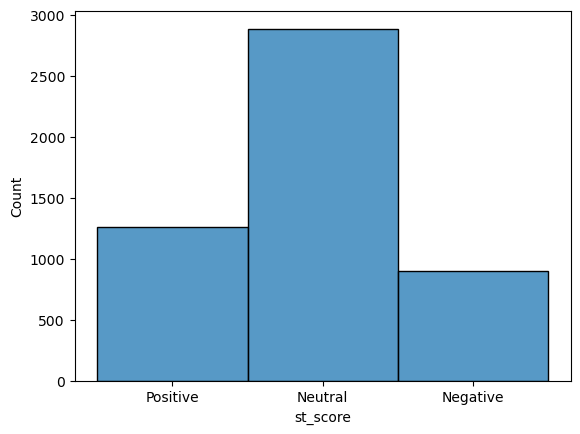

In [86]:
sns.histplot(data = df_sent_comments["st_score"])

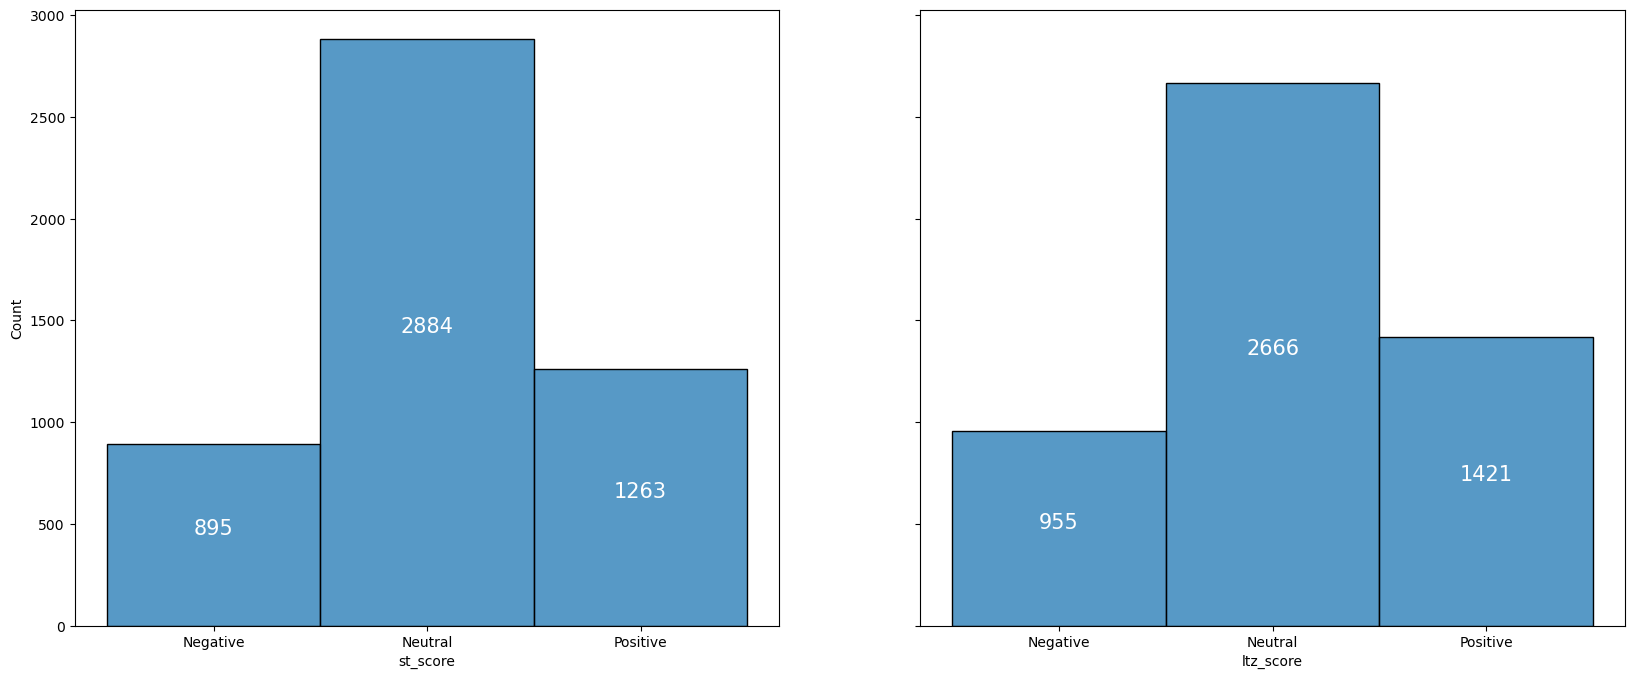

In [87]:
# Create a subplot for each year
fig, axes = plt.subplots(ncols = 2, figsize = (20, 8), sharey = True)


hist_st = sns.histplot(data = df_sent_comments["st_score"].sort_values(), ax = axes[0])

score_group = df_sent_comments.groupby("st_score")["Comments"].count()

for score in range(len(score_group)):
     hist_st.text(score, score_group[score]/2, str(score_group[score]),
     fontdict = dict(color = "white", fontsize = 15),
     horizontalalignment = "center")
         
hist_ltz = sns.histplot(data = df_sent_comments["ltz_score"].sort_values(), ax = axes[1])

score_groupltz = df_sent_comments.groupby("ltz_score")["Comments"].count()

for score in range(len(score_groupltz)):
     hist_ltz.text(score, score_groupltz[score]/2, str(score_groupltz[score]),
     fontdict = dict(color = "white", fontsize = 15),
     horizontalalignment = "center")


plt.show()

In [88]:
df_sent_comments

,Comments,st,ltz,st_sentiment,st_score,ltz_sentiment,ltz_score
0,work luas sent red notice interpol immediate e...,work lua sent red notic interpol immedi extrad...,work luas sent red notice interpol immediate e...,0.200000,Positive,0.200000,Positive
1,absolutely fuming encounter luas inspector tod...,absolut fume encount lua inspector today green...,absolutely fuming encounter luas inspector tod...,0.128286,Positive,0.101631,Positive
2,never tackle absolute mutants whove never paid...,never tackl absolut mutant whove never paid lu...,never tackle absolute mutant whove never paid ...,0.136364,Positive,0.200000,Positive
3,absolutely fuming encounter luas inspector tod...,absolut fume encount lua inspector today green...,absolutely fuming encounter luas inspector tod...,0.128286,Positive,0.101631,Positive
4,leapcard registered online log theyll send ref...,leapcard regist onlin log theyll send refund c...,leapcard registered online log theyll send ref...,0.000000,Neutral,0.000000,Neutral
...,...,...,...,...,...,...,...
5037,,,,0.000000,Neutral,0.000000,Neutral
5038,fence footpath 119 moron thought putting good ...,fenc footpath 119 moron thought put good idea ...,fence footpath 119 moron thought putting good ...,-0.050000,Negative,-0.050000,Negative
5039,,,,0.000000,Neutral,0.000000,Neutral
5040,load crap cant see aftermath,load crap cant see aftermath,load crap cant see aftermath,-0.800000,Negative,-0.800000,Negative


In [89]:
df_sent_comments.groupby("st_score")["st_sentiment"].count()

st_score
Negative     895
Neutral     2884
Positive    1263
Name: st_sentiment, dtype: int64

## Text Classification